# Image Classification -- CIFAR-10
> This notebook demonstrates various techniques of effective Neural Network models training using the Callbacks mechanism of FastAI library (v1).

[`Imagewoof` dataset](https://github.com/fastai/imagenette)


## Getting the Data

In [0]:
from fastai.vision import *

In [0]:
from fastai.callbacks import *

In [3]:
path = untar_data(URLs.CIFAR) 

In [4]:
(path).ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

In [0]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.1)
        .label_from_folder()
        .transform(get_transforms())
        .add_test_folder()
        .databunch(bs=128)
        .normalize(imagenet_stats))

In [7]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
data.c

10

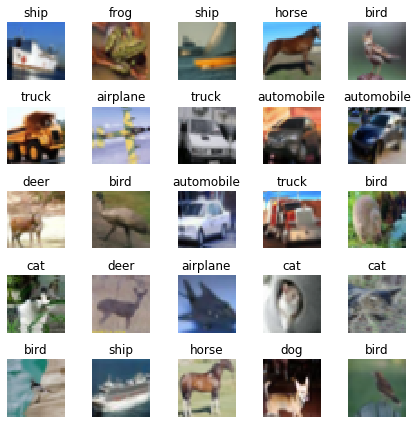

In [9]:
data.show_batch(figsize=(6,6))

We will decode the dataset labels to be more meaningful to a human.

## Randomly Initialized CONV Model

In [0]:
results = pd.DataFrame(index=range(5))

In [11]:
int(torch.cuda.max_memory_allocated(0)/(1024*1024))

4

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], pretrained=False, callback_fns=[CSVLogger,ShowGraph])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


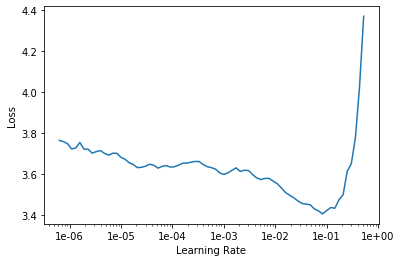

In [41]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.357704,2.542866,0.225500,01:49
1,1.929239,102.319199,0.286333,01:47
2,1.584136,56.509899,0.443833,01:47
3,1.341141,151.094666,0.551667,01:47
4,1.221145,56.869053,0.580333,01:46


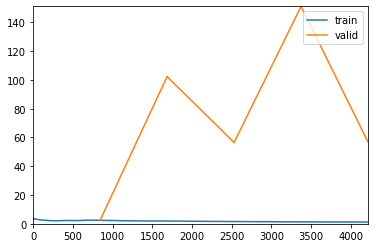

In [42]:
learn.fit_one_cycle(5,max_lr=2e-2)

In [45]:
results['resnet50'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
results.head()

,resnet50
0,0.225500
1,0.286333
2,0.443833
3,0.551667
4,0.580333


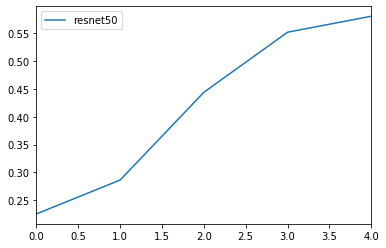

In [46]:
results.plot()

## Pretrained CONV net Model

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], pretrained=True, callback_fns=[CSVLogger,ShowGraph])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 43.7MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


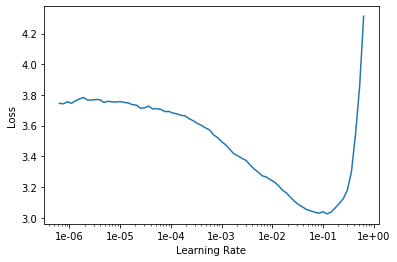

In [15]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.282305,2.112646,0.603500,01:14
1,1.145639,0.976998,0.666333,01:11
2,0.874673,0.793526,0.733833,01:11
3,0.716800,0.646512,0.777667,01:10
4,0.672841,0.613900,0.789000,01:10


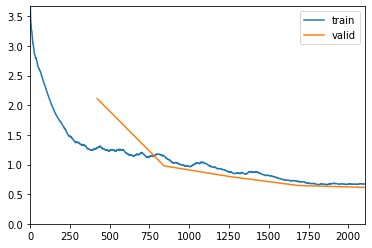

In [16]:
learn.fit_one_cycle(5,max_lr=1e-2)

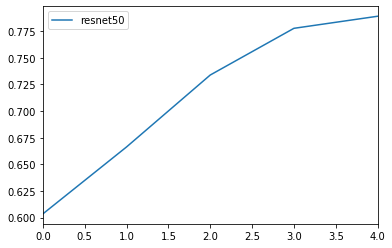

In [17]:
results['resnet50'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
results.plot()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


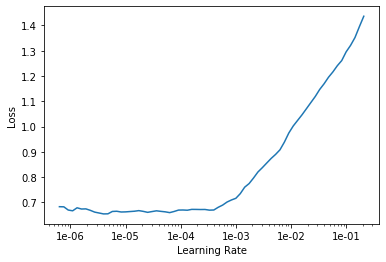

In [21]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.649836,0.592496,0.796333,01:15
1,0.614419,0.564902,0.805167,01:15
2,0.549149,0.523487,0.818000,01:14
3,0.516912,0.507475,0.824000,01:14
4,0.506928,0.501431,0.824333,01:13


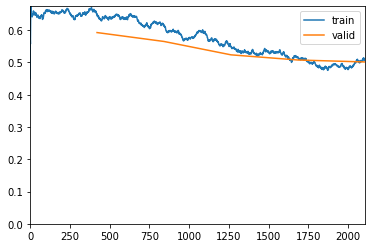

In [22]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [0]:
learn.save('stage-2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


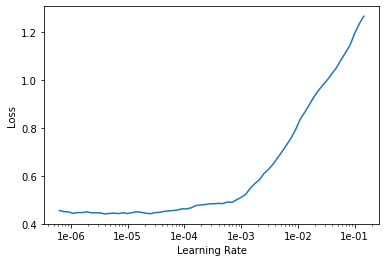

In [24]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.491695,0.496973,0.827833,01:22
1,0.473029,0.492568,0.828000,01:24
2,0.487501,0.494257,0.828500,01:23
3,0.465729,0.495584,0.827500,01:20
4,0.466885,0.495300,0.827833,01:19


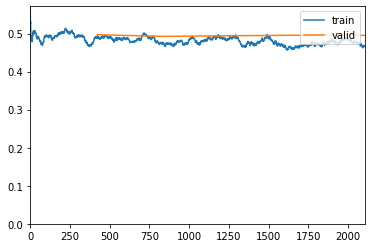

In [25]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

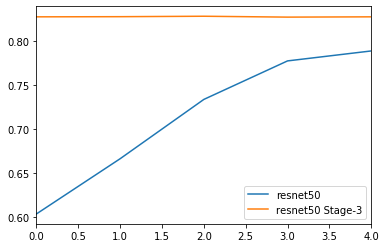

In [26]:
results['resnet50 Stage-3'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
results.plot()

In [0]:
learn.save('stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


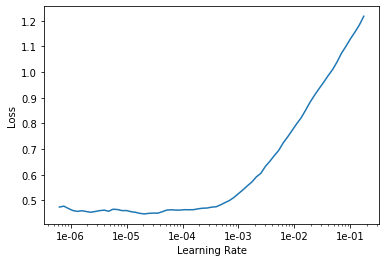

In [28]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.485009,0.488910,0.831667,01:19
1,0.473261,0.488016,0.831667,01:18
2,0.458254,0.475492,0.833500,01:16
3,0.450998,0.471915,0.839000,01:15
4,0.440244,0.474717,0.836833,01:15


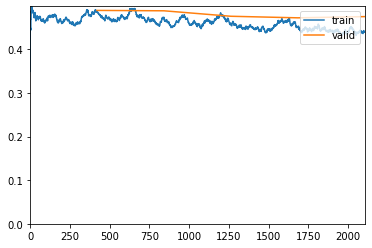

In [29]:
learn.fit_one_cycle(5,max_lr=slice(3e-6,3e-5))

In [0]:
learn.save('stage-4')

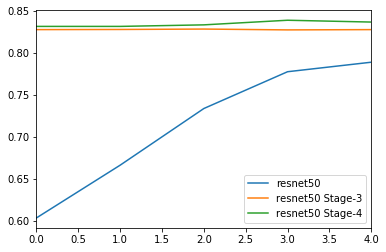

In [31]:
results['resnet50 Stage-4'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
results.plot()

## Results

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

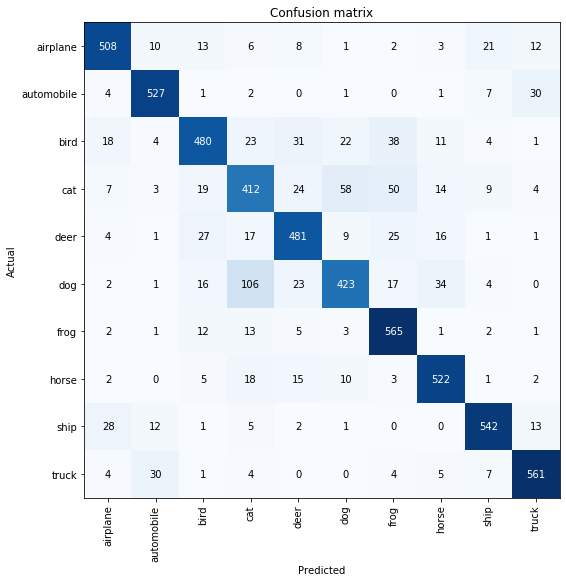

In [33]:
interp.plot_confusion_matrix(figsize=(8,8))

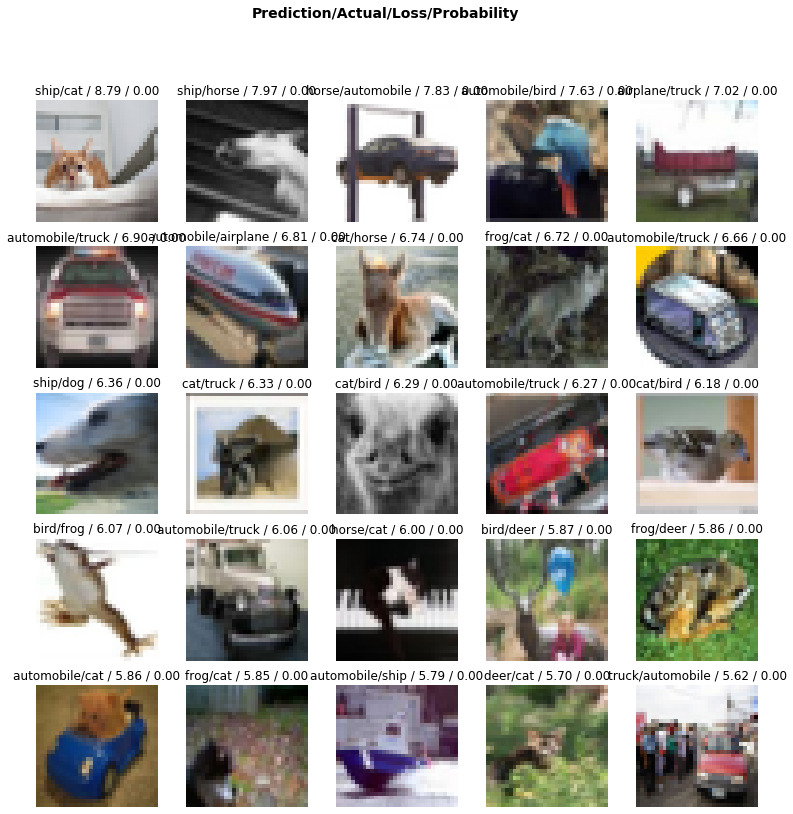

In [34]:
interp.plot_top_losses(25, figsize=(13,13))

In [35]:
interp.most_confused(min_val=3)

[('dog', 'cat', 106),
 ('cat', 'dog', 58),
 ('cat', 'frog', 50),
 ('bird', 'frog', 38),
 ('dog', 'horse', 34),
 ('bird', 'deer', 31),
 ('automobile', 'truck', 30),
 ('truck', 'automobile', 30),
 ('ship', 'airplane', 28),
 ('deer', 'bird', 27),
 ('deer', 'frog', 25),
 ('cat', 'deer', 24),
 ('bird', 'cat', 23),
 ('dog', 'deer', 23),
 ('bird', 'dog', 22),
 ('airplane', 'ship', 21),
 ('cat', 'bird', 19),
 ('bird', 'airplane', 18),
 ('horse', 'cat', 18),
 ('deer', 'cat', 17),
 ('dog', 'frog', 17),
 ('deer', 'horse', 16),
 ('dog', 'bird', 16),
 ('horse', 'deer', 15),
 ('cat', 'horse', 14),
 ('airplane', 'bird', 13),
 ('frog', 'cat', 13),
 ('ship', 'truck', 13),
 ('airplane', 'truck', 12),
 ('frog', 'bird', 12),
 ('ship', 'automobile', 12),
 ('bird', 'horse', 11),
 ('airplane', 'automobile', 10),
 ('horse', 'dog', 10),
 ('cat', 'ship', 9),
 ('deer', 'dog', 9),
 ('airplane', 'deer', 8),
 ('automobile', 'ship', 7),
 ('cat', 'airplane', 7),
 ('truck', 'ship', 7),
 ('airplane', 'cat', 6),
 ('frog